# Apodization

In [1]:
import spectrochempy as scp
from spectrochempy.core.units import ur

## Introduction

As an example, apodization is a transformation particularly useful for preprocessing NMR time domain data before
Fourier transformation. It generally helps for signal-to-noise improvement.

In [2]:
# read an experimental spectra
path = scp.pathclean("nmrdata/bruker/tests/nmr/topspin_1d")

# the method pathclean allow to write pth in linux or window style indifferently
dataset = scp.read_topspin(path, expno=1, remove_digital_filter=True)
dataset = dataset / dataset.max()  # normalization

# store original data
nd = dataset.copy()

# show data
nd

Running on GitHub Actions
MPL Configuration directory: /home/runner/.config/matplotlib
Stylelib directory: /home/runner/.config/matplotlib/stylelib


NDDataset: [complex128] dimensionless (size: 12411)

### Plot of the Real and Imaginary original data

<Matplotlib Axes object>

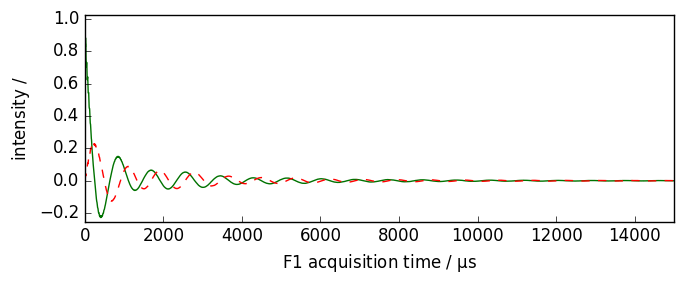

In [3]:
nd.plot(xlim=(0.0, 15000.0))
nd.plot(imag=True, data_only=True, clear=False, color="r")

### Exponential multiplication

<Matplotlib Axes object>

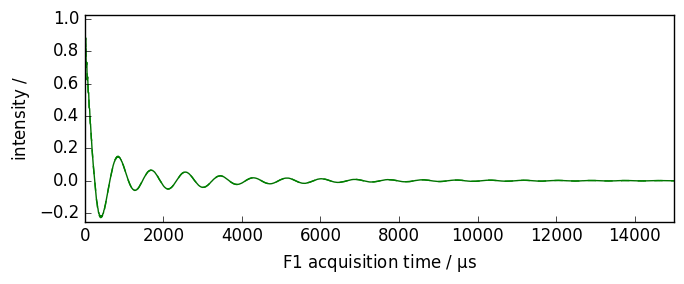

In [4]:
nd.plot(xlim=(0.0, 15000.0))
_ = nd.em(lb=300.0 * ur.Hz)
nd.plot(data_only=True, clear=False, color="g")

**Warning:** processing function are most of the time applied inplace. Use
`inplace=False` option to avoid this if
necessary

<Matplotlib Axes object>

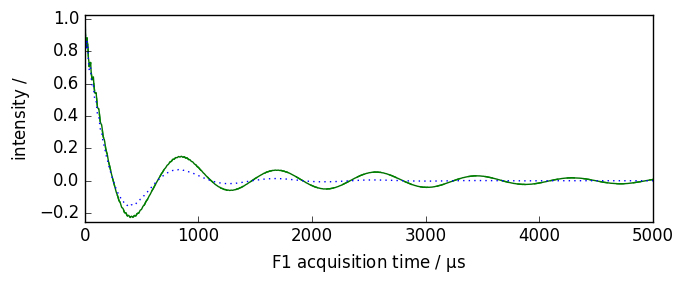

In [5]:
nd = dataset.copy()  # to go back to the original data
nd.plot(xlim=(0.0, 5000.0))
ndlb = nd.em(lb=300.0 * ur.Hz, inplace=False)  # ndlb contain the processed data
nd.plot(data_only=True, clear=False, color="g")  # nd dataset remain unchanged
ndlb.plot(data_only=True, clear=False, color="b")

Of course, imaginary data are also transformed at the same time

<Matplotlib Axes object>

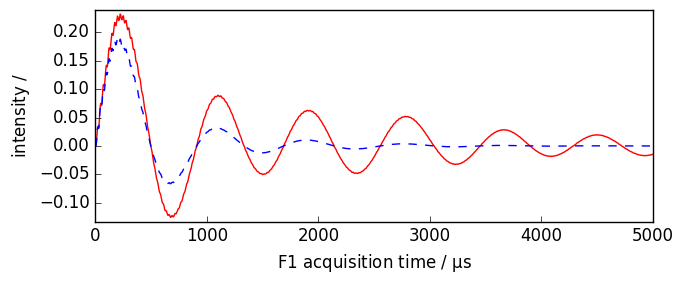

In [6]:
nd.plot(imag=True, xlim=(0, 5000), color="r")
ndlb.plot(imag=True, data_only=True, clear=False, color="b")

If we want to display the apodization function, we can use the `retapod=True` parameter.

<Matplotlib Axes object>

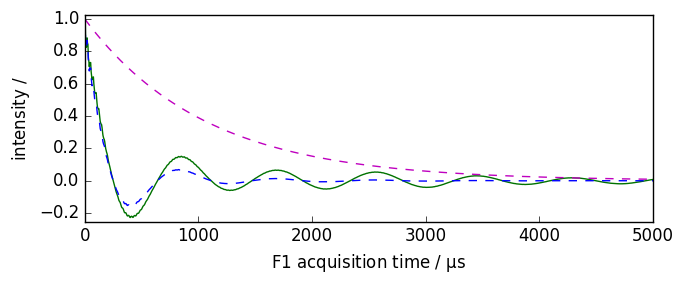

In [7]:
nd = dataset.copy()
nd.plot(xlim=(0.0, 5000.0))
ndlb, apod = nd.em(
    lb=300.0 * ur.Hz, inplace=False, retapod=True
)  # ndlb contain the processed data and apod the
# apodization function
ndlb.plot(data_only=True, clear=False, color="b")
apod.plot(data_only=True, clear=False, color="m", linestyle="--")

#### Shifted apodization

<Matplotlib Axes object>

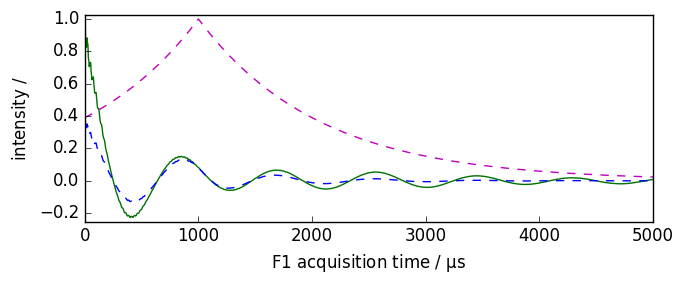

In [8]:
nd = dataset.copy()
nd.plot(xlim=(0.0, 5000.0))
ndlb, apod = nd.em(
    lb=300.0 * ur.Hz, shifted=1000 * ur.us, inplace=False, retapod=True
)  # ndlb contain the processed data and apod the apodization function
ndlb.plot(data_only=True, clear=False, color="b")
apod.plot(data_only=True, clear=False, color="m", linestyle="--")

### Other apodization functions

#### Gaussian-Lorentzian apodization

<Matplotlib Axes object>

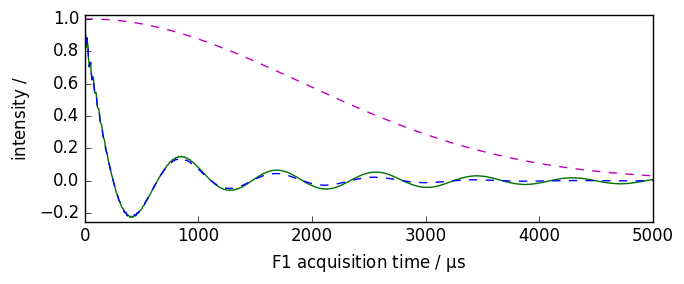

In [9]:
nd = dataset.copy()
lb = 10.0
gb = 200.0
ndlg, apod = nd.gm(lb=lb, gb=gb, inplace=False, retapod=True)
nd.plot(xlim=(0.0, 5000.0))
ndlg.plot(data_only=True, clear=False, color="b")
apod.plot(data_only=True, clear=False, color="m", linestyle="--")

#### Shifted Gaussian-Lorentzian apodization

<Matplotlib Axes object>

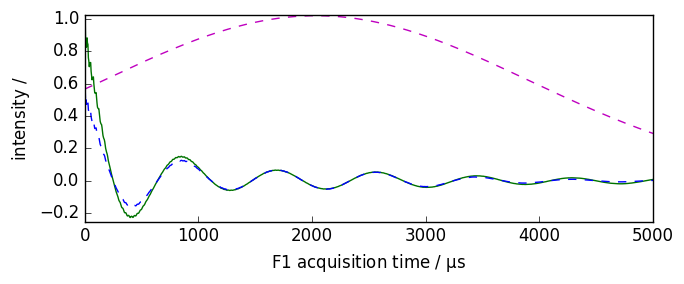

In [10]:
nd = dataset.copy()
lb = 10.0
gb = 200.0
ndlg, apod = nd.gm(lb=lb, gb=gb, shifted=2000 * ur.us, inplace=False, retapod=True)
nd.plot(xlim=(0.0, 5000.0))
ndlg.plot(data_only=True, clear=False, color="b")
apod.plot(data_only=True, clear=False, color="m", linestyle="--")

#### Apodization using sine window multiplication

The`sp`  apodization is by default performed on the last dimension.

Functional form of apodization window (cfBruker TOPSPIN manual): $sp(t) = \sin(\frac{(\pi - \phi) t }{\text{aq}} +
\phi)^{pow}$

where
* $0 < t < \text{aq}$ and  $\phi = \pi ⁄ \text{sbb}$ when $\text{ssb} \ge 2$

or
*    $\phi = 0$ when $\text{ssb} < 2$

$\text{aq}$ is an acquisition status parameter and $\text{ssb}$ is a processing parameter (see below) and $\text{
pow}$ is an exponent equal to 1 for a sine bell window or 2 for a squared sine bell window.

The $\text{ssb}$ parameter mimics the behaviour of the `SSB` parameter on bruker TOPSPIN software:
* Typical values are 1 for a pure sine function and 2 for a pure cosine function.
* Values greater than 2 give a mixed sine/cosine function. Note that all values smaller than 2, for example 0,
have the same effect as $\text{ssb}=1$, namely a pure sine function.

**Shortcuts**:
* `sine` is strictly an alias of `sp`
* `sinm` is equivalent to `sp` with $\text{pow}=1$
* `qsin` is equivalent to `sp` with $\text{pow}=2$

Below are several examples of `sinm` and `qsin` apodization functions.

<Matplotlib Axes object>

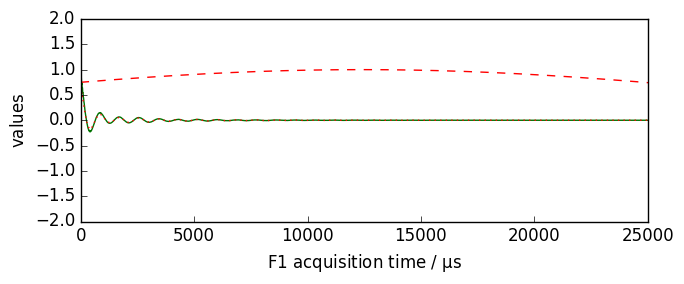

In [11]:
nd = dataset.copy()
nd.plot()

new, curve = nd.qsin(ssb=3, retapod=True)
curve.plot(color="r", clear=False)
new.plot(xlim=(0, 25000), zlim=(-2, 2), data_only=True, color="r", clear=False)

<Matplotlib Axes object>

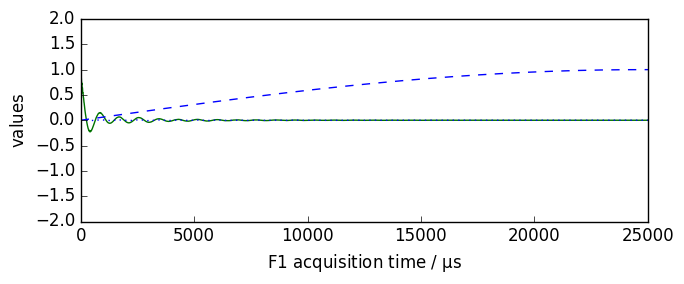

In [12]:
nd = dataset.copy()
nd.plot()

new, curve = nd.sinm(ssb=1, retapod=True)
curve.plot(color="b", clear=False)
new.plot(xlim=(0, 25000), zlim=(-2, 2), data_only=True, color="b", clear=False)

<Matplotlib Axes object>

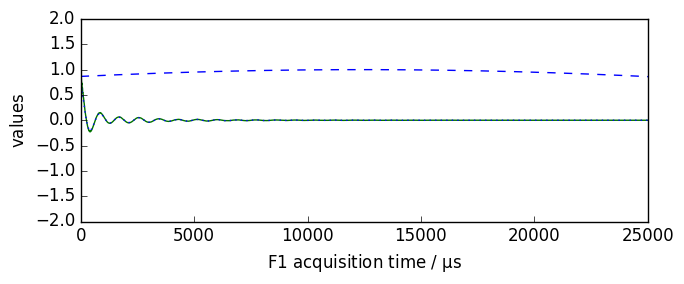

In [13]:
nd = dataset.copy()
nd.plot()

new, curve = nd.sinm(ssb=3, retapod=True)
curve.plot(color="b", ls="--", clear=False)
new.plot(xlim=(0, 25000), zlim=(-2, 2), data_only=True, color="b", clear=False)

<Matplotlib Axes object>

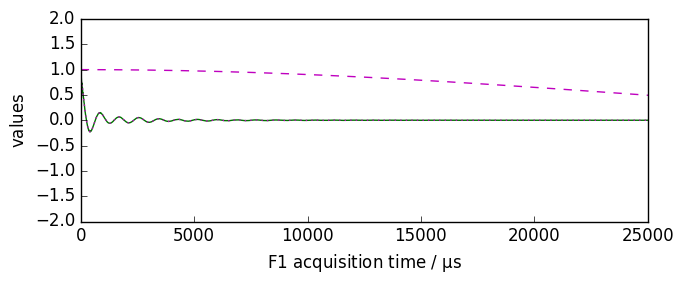

In [14]:
nd = dataset.copy()
nd.plot()

new, curve = nd.qsin(ssb=2, retapod=True)
curve.plot(color="m", clear=False)
new.plot(xlim=(0, 25000), zlim=(-2, 2), data_only=True, color="m", clear=False)

<Matplotlib Axes object>

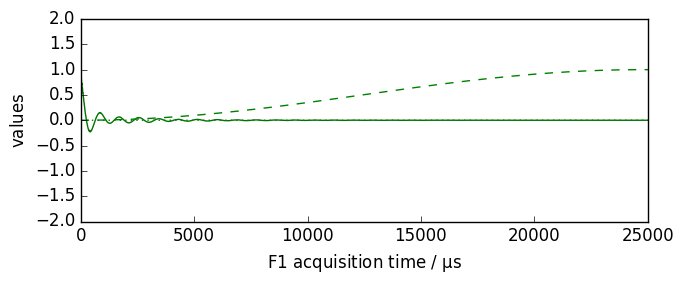

In [15]:
nd = dataset.copy()
nd.plot()

new, curve = nd.qsin(ssb=1, retapod=True)
curve.plot(color="g", clear=False)
new.plot(xlim=(0, 25000), zlim=(-2, 2), data_only=True, color="g", clear=False)